In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from time import time
from mpl_toolkits.mplot3d import Axes3D
import math
import os
from matplotlib import cm


In [2]:
from classes.cartesian.Mesh import Mesh
from classes.NeuralNet import PINN_NeuralNet
from classes.cartesian.PINN import PINN
from classes.cartesian.PINN import PINN_Precond
from classes.cartesian.PDE_Model import PDE_Model
from classes.cartesian.Preconditioner import preconditioner
from classes.cartesian.Postprocessing import view_results

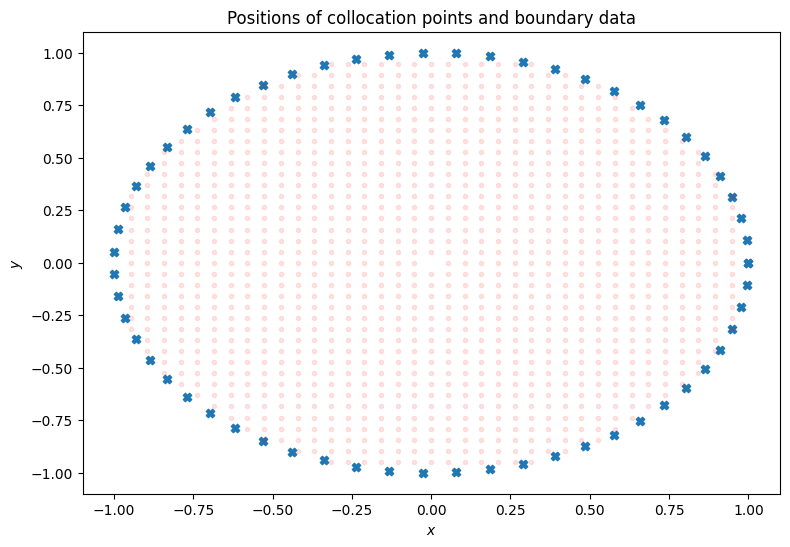

In [3]:
precond = preconditioner()

domain = ([-1,1],[-1,1])

domain = precond.set_domain(domain)

lb = {'type':'D', 'value':0, 'fun':None, 'dr':None, 'r':1}
borders = {'1':lb}
ins_domain = {'rmax': 1, 'rmin':0.02}

mesh = Mesh(domain, N_b=60, N_r=1500)
mesh.create_mesh(borders, ins_domain)
mesh.plot_points();

PINN_precond = PINN_Precond()

PINN_precond.adapt_mesh(mesh)

lr = ([1000,3000],[1e-2,5e-3,5e-4])
hyperparameters = {
        'input_shape_N': (None,2),
        'num_hidden_layers': 8,
        'num_neurons_per_layer': 20,
        'output_dim': 1,
        'activation': 'tanh'
}

PINN_precond.create_NeuralNet(PINN_NeuralNet,lr=lr,**hyperparameters)

PINN_precond.load_preconditioner(precond)


In [4]:
PINN_precond.preconditionate(N=1000,flag_time=False)

In [5]:
PINN_post = view_results(PINN_precond)

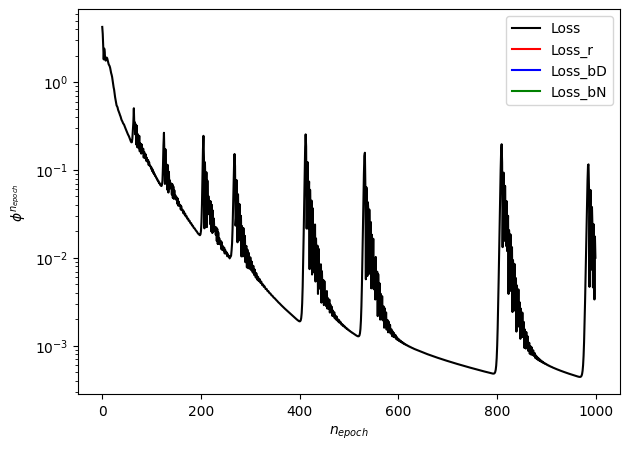

In [6]:
PINN_post.plot_loss_history();

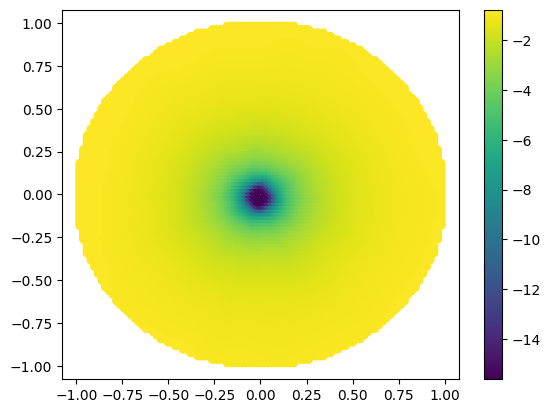

In [7]:
PINN_post.plot_u_domain_countour();

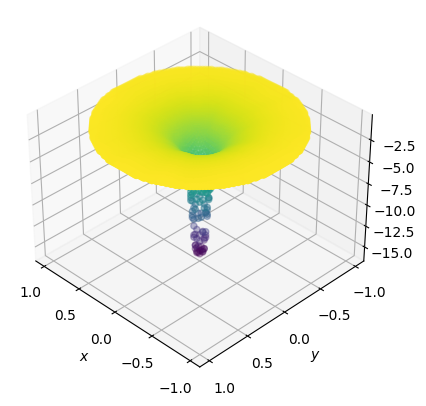

In [8]:
PINN_post.plot_u_domain_surface();

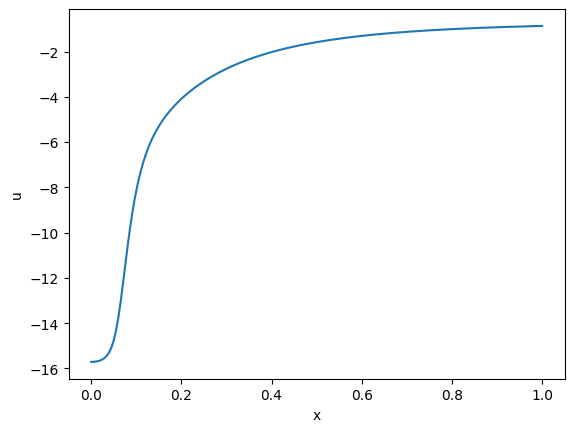

In [9]:
PINN_post.plot_u_plane()

In [10]:
x = np.linspace(0,1)
y = np.linspace(0,1)*0
x,y,u = PINN_post.evaluate_u_array([x,y])

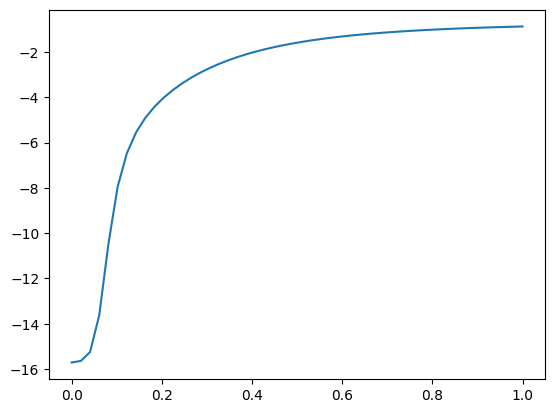

In [11]:
plt.plot(x,u)